# IIA - TP2


#### Consigna
Se requiere construir un modelo de regresión que permita predecir el valor medio de las casas en distintos distritos de California, EE. UU. (medido en cientos de miles de dólares, es decir, $100,000). Este conjunto de datos proviene del censo de EE. UU. de 1990, donde cada observación corresponde a un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra, y típicamente tiene una población de entre 600 y 3.000 personas.

Los atributos, en el orden en que se presentan en el conjunto de datos, son:

- __MedInc:__ Ingreso medio en el bloque
- __HouseAge:__ Edad mediana de las casas en el bloque
- __AveRooms:__ Número promedio de habitaciones por hogar
- __AveBedrms:__ Número promedio de dormitorios por hogar
- __Population:__ Población del bloque
- __AveOccup:__ Número promedio de personas por hogar
- __Latitude:__ Latitud del bloque
- __Longitude:__ Longitud del bloque

El target es:

__MedHouseVal:__ Mediana del valor de las casas en el bloque (en unidades de $100,000)
#### Tareas y preguntas a resolver:

Obtener la correlación entre los atributos y entre los atributos y el target.
* ¿Qué atributo tiene mayor correlación lineal con el target? 
* ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.
* Graficar los histogramas de los distintos atributos y del target. 
* ¿Qué forma presentan los histogramas?
* ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?
* Calcular una regresión lineal utilizando todos los atributos. 
* Con el conjunto de entrenamiento, calcular la varianza total de los datos y la varianza explicada por el modelo.
* ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.
* Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.
* Crear una regresión de Ridge. 
* Usar validación cruzada de 5 folds y tomar como métrica el MSE.
* Buscar el mejor valor de α en el rango [0, 12.5].
* Graficar el MSE en función de α.
* Comparar los resultados obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.
* ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
* ¿Qué tipo de error podría haberse reducido?

# Resolución


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge




In [2]:
# Inicialización de seaborn
sns.set_theme()

# Lectura del dataset
california_housing = fetch_california_housing()

# Obtenemos los atributos y el target:
X = california_housing.data
y = california_housing.target

# Transformamos los datos a estructuras de Pandas:
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos X e y; esto es útil para generar el mapa de calor de correlaciones
df_california = pd.concat([X, y], axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1. Matriz de correlación y Mapa de calor 

Matriz de correlación entre atributos y target:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.0

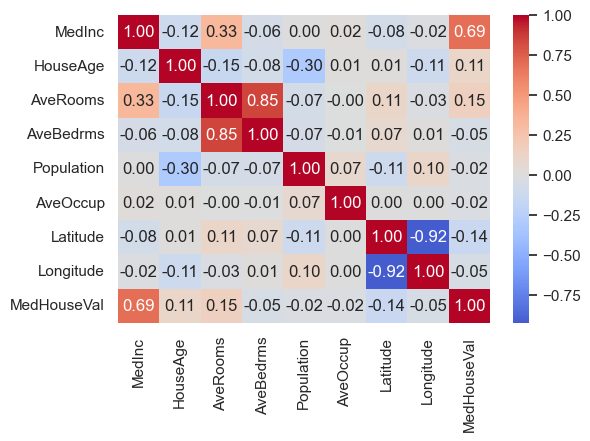


El atributo con mayor correlación lineal con el target es 'MedInc' con un valor de 0.6881

Pares de atributos con alta correlación (> 0.7):
AveRooms y AveBedrms: 0.85
Latitude y Longitude: -0.92


In [6]:
plt.figure(figsize=(6, 4))

correlation_matrix = df_california.corr()
print("Matriz de correlación entre atributos y target:")
print(correlation_matrix)

target_corr = correlation_matrix['MedHouseVal'].drop('MedHouseVal')
max_corr_attr = target_corr.abs().idxmax()
max_corr_value = target_corr[max_corr_attr]


sns.heatmap(data=correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.show()
print(f"\nEl atributo con mayor correlación lineal con el target es '{max_corr_attr}' con un valor de {max_corr_value:.4f}")

corr_attrs = correlation_matrix.drop('MedHouseVal').drop(columns='MedHouseVal')

high_corr_pairs = []

threshold = 0.7

for i in corr_attrs.columns:
    for j in corr_attrs.columns:
        if i != j:
            corr_val = corr_attrs.loc[i,j]
            if abs(corr_val) > threshold:
                if (j,i) not in high_corr_pairs and (i,j) not in high_corr_pairs:
                    high_corr_pairs.append((i,j))

print("\nPares de atributos con alta correlación (> 0.7):")
for pair in high_corr_pairs:
    corr_val = corr_attrs.loc[pair[0], pair[1]]
    print(f"{pair[0]} y {pair[1]}: {corr_val:.2f}")

#### 1.1 Obtener la correlación entre los atributos y entre los atributos y el target.


##### ¿Qué atributo tiene mayor correlación lineal con el target?
El atributo MedInc tiene la mayor correlación positiva con el valor medio de las casas, según se puede apreciar en la matriz

Correlación = 0.69

Esto indica que a mayor ingreso en el bloque, mayor suele ser el valor de las casas, lo cual es coherente económicamente.


##### ¿Cuáles atributos parecen estar más correlacionados entre sí?

Pares de atributos con alta correlación (> 0.7):

AveRooms y AveBedrms: 0.85

Latitude y Longitude: -0.92


### 2. Histogramas

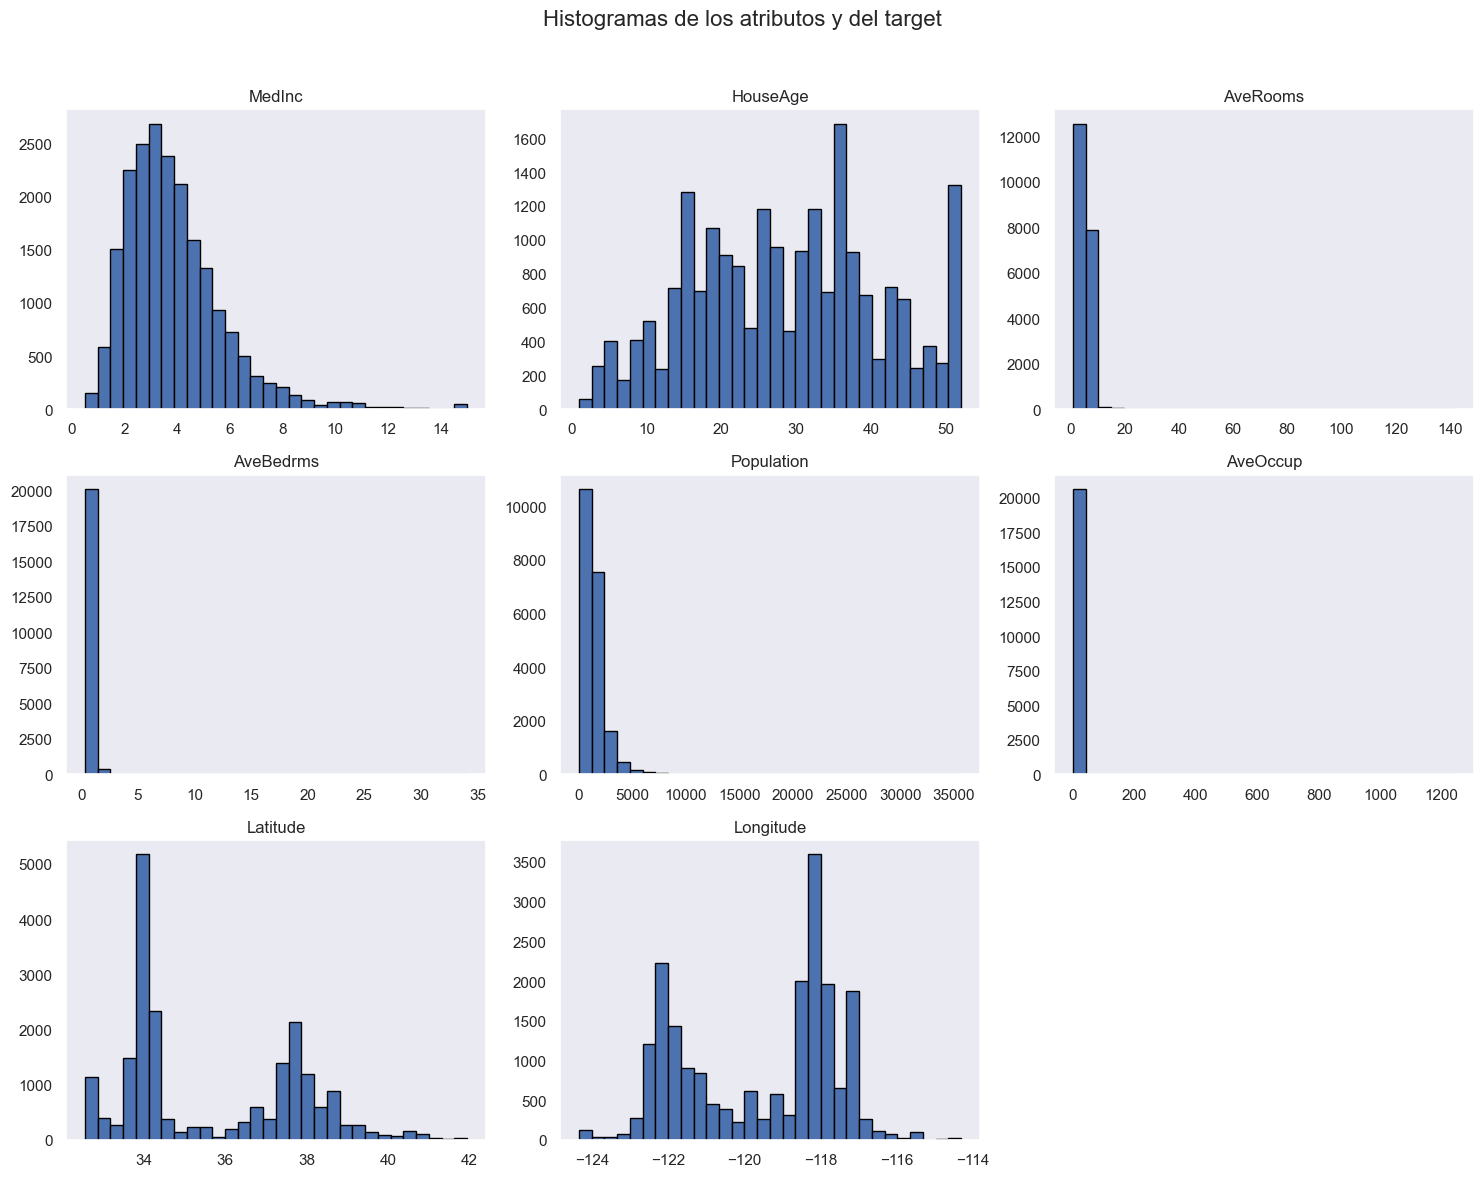

In [7]:
X.hist(bins=30, figsize=(15, 12), edgecolor='black', grid=False)
plt.suptitle("Histogramas de los atributos y del target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

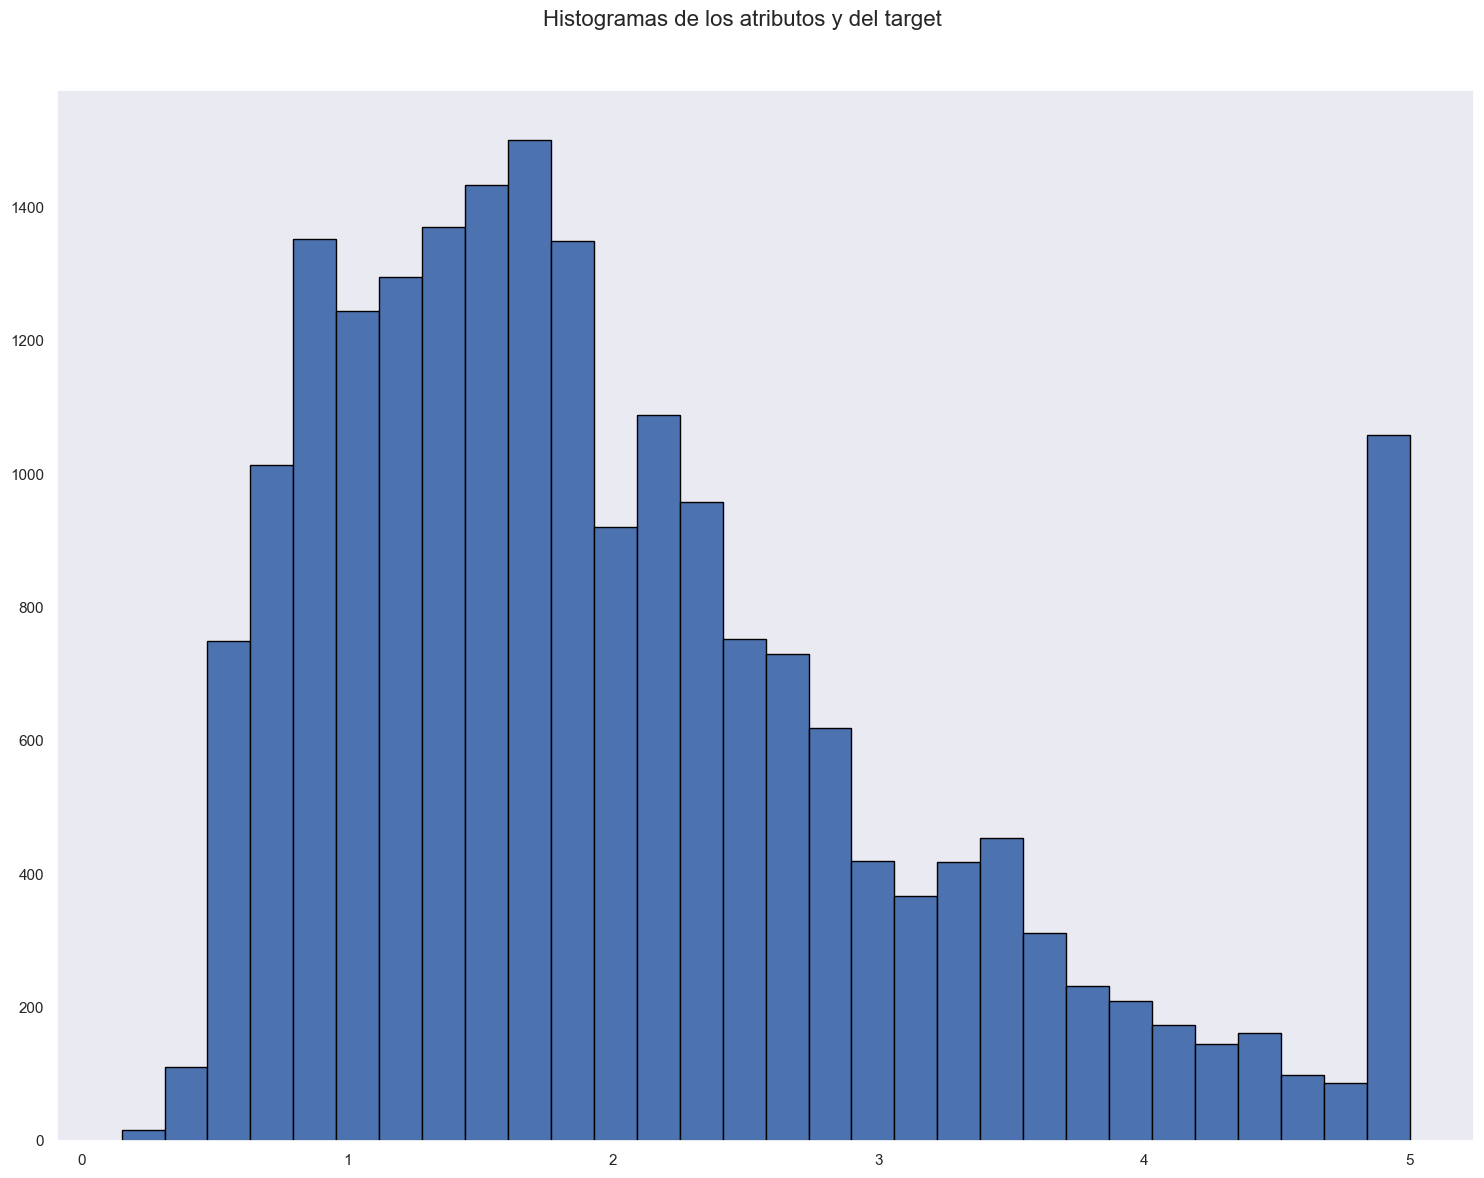

In [8]:
y.hist(bins=30, figsize=(15, 12), edgecolor='black', grid=False)
plt.suptitle("Histogramas de los atributos y del target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 2.1 ¿Qué forma presentan los histogramas?
* MedInc:
Presenta una forma asimétrica a la derecha (sesgo positivo). Hay muchos bloques con ingresos bajos o medios, y pocos con ingresos altos.
* HouseAge:
Tiene una distribución con picos en múltiplos de 5 y una acumulación en los 50 años, que podría deberse a un límite superior impuesto.
* AveRooms, AveBedrms, AveOccup:
Extremadamente sesgadas a la derecha, con valores extremos en los ejes.
* Population:
También muy sesgada a la derecha, con la mayoría de los bloques teniendo baja población, y algunos pocos muy poblados.
* Latitude y Longitude:
No presentan distribuciones normales. Picos asimétricos, no presenta forma de campana.
* MedHouseVal:
Tiene una forma bastante asimétrica hacia la izquierda. Se nota que muchos valores están agrupados cerca del máximo permitido, que es 5.0



#### 2.2 ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?
No, ninguna de las variables presenta una forma claramente gaussiana. La que más se le acerca es MedInc, aunque también muestra cierta asimetría hacia la derecha, por lo que no se puede decir que tenga una distribución en forma de campana pura.

### 3. Regresión lineal

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimensión de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimensión de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimensión de X_train: (14448, 8)
Valores de y_train: 14448
Dimensión de X_test: (6192, 8)
Valores de y_test: 6192


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) 
])


In [11]:
pipeline

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
var_total = np.var(y_train, ddof=0)
print(f"Varianza total: {var_total}")
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
var_explained = np.var(y_test_pred, ddof=0)

r2 = r2_score(y_train, y_train_pred)
print(f"Varianza explicada: {var_explained}")
print(f"Proporción de varianza explicada (R^2): {r2:.4f}")

Varianza total: 1.3396959774719193
Varianza explicada: 0.8101928216172495
Proporción de varianza explicada (R^2): 0.6093


#### 3.1 Con el conjunto de entrenamiento, calcular la varianza total de los datos y la varianza explicada por el modelo.
Varianza total del target (y_train): 1.3397

Varianza explicada por el modelo: 0.8163


#### 3.2 ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.

En base al valor de R^2 obtenido (0.6093), se puede decir que el modelo logra explicar un poco más del 60% de la variabilidad del valor medio de las casas en el conjunto de entrenamiento. No es un modelo perfecto, pero tampoco es malo: muestra que los atributos tienen relación con el target y que el modelo logra captar una parte importante del comportamiento.

De todas formas, todavía queda una porción considerable sin explicar, lo que puede deberse a relaciones no lineales o a que hay otros factores que no están siendo considerados en el modelo.

### 4. Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.

In [14]:
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error)

r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

mean_med_house_val = np.mean(y_train)

y_pred_baseline = np.full_like(y_test, mean_med_house_val)

r2_baseline = r2_score(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print('Metricas del modelo')
print()
print(f'R^2{r2:.4f} ')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')
print()
print('Metricas del modelo base')
print()
print(f'Baseline R^2{r2_baseline:.4f} ')
print(f'Baseline MAE:{mae_baseline:.4f}')
print(f'Baseline MSE:{mse_baseline:.4f}')

Metricas del modelo

R^20.5958 
MAE:0.5272
MSE:0.5306

Metricas del modelo base

Baseline R^2-0.0000 
Baseline MAE:0.9062
Baseline MSE:1.3125


### 5.Crear una regresión de Ridge.

In [15]:
rigde_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge()) 
])

In [16]:
rigde_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


El mejor valor de alpha es: 6.5657
Con un MSE promedio de validación cruzada de: 0.5268
Con un MAE promedio de validación cruzada de: 0.5318)


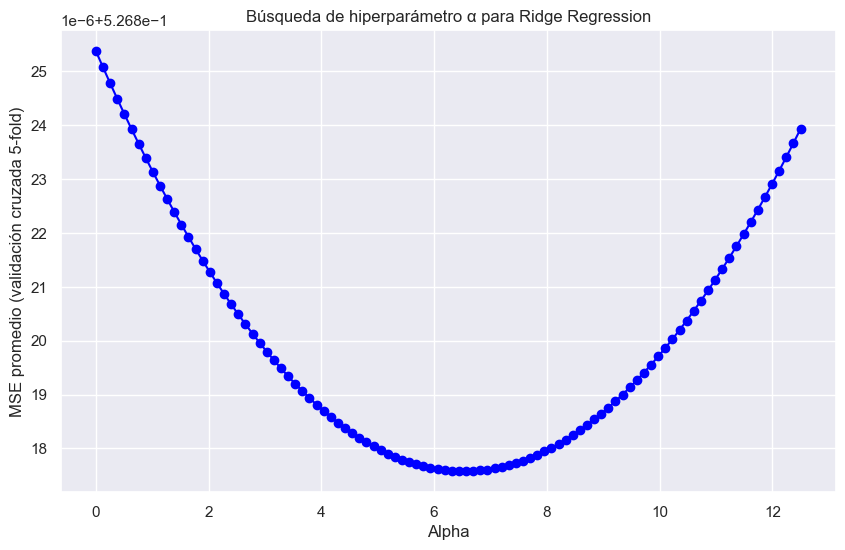

In [ ]:
# 100 valores entre 0 y 12.5 para alpha
alpha_values = np.linspace(0, 12.5, 100)
mse_scores = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    # scikit-learn devuelve el MSE como negativo
    neg_mse = cross_val_score(ridge, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    ridge_mse = -neg_mse.mean()
    mse_scores.append(ridge_mse)

mse_scores = np.array(mse_scores)

# alpha con menor MSE
best_alpha = alpha_values[np.argmin(mse_scores)]
best_mse = np.min(mse_scores)

print(f"El mejor valor de alpha es: {best_alpha:.4f}")
print(f"Con un MSE promedio de validación cruzada de: {best_mse:.4f}")

# Grafico de MSE en función de alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Alpha")
plt.ylabel("MSE promedio (validación cruzada 5-fold)")
plt.title("Búsqueda de hiperparámetro α para Ridge Regression")
plt.grid(True)
plt.show()


In [22]:
# Evaluación del mejor modelo Ridge en el conjunto de prueba
scaler_final = StandardScaler()
X_train_scaled_final = scaler_final.fit_transform(X_train)
X_test_scaled_final = scaler_final.transform(X_test)

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled_final, y_train)

y_pred_ridge = best_ridge.predict(X_test_scaled_final)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

#Comparación de los modelos con el conjunto de prueba
print()
print("Regresión lineal:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print()
print("Ridge (α = {:.4f}):".format(best_alpha))
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print()
print(f"Diferencia en MSE: {mse - mse_ridge:.4f}")
print(f"Diferencia en MAE: {mae - mae_ridge:.4f}")



Regresión lineal:
MAE: 0.5272
MSE: 0.5306

Ridge (α = 6.5657):
MAE: 0.5272
MSE: 0.5304

Diferencia en MSE: 0.0002
Diferencia en MAE: 0.0000


#### 5.1

**Análisis:**
1. **En términos de MSE:** Ridge tiene muy poca mejora en los resultados.

2. **En términos de MAE:** No se observan diferencias.

Dada la poca diferencia que existe no se puede  afirmar que un modelo es mejor que el otro.

#### 5.2

**Tipo de error en el trade-off sesgo - varianza:**
Ridge introduce un pequeño sesgo para reducir significativamente la varianza, resultando en un menor error total de generalización por lo tanto al no tener variables fuertemente correlacionadas (el máximo está en 0,69 y es con el target) no hay mucha reducción.
